**importing the necessary library for EDA**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Defining the file path for csv file**

In [15]:
file_path = 'D:/codercavedata/globalterrorism.csv'

**Loading the csv file**

In [16]:
data = pd.read_csv(file_path,encoding='latin1')

C:\Users\Have a Nice Day\AppData\Local\Temp\ipykernel_2852\2323576703.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path,encoding='latin1')


**To know about the terrorist dataset**

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB
None


**To know about the null values in the dataset**

In [18]:
print(data.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


**To get an overview about dataset**

In [20]:
print(data.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002704e+11    2002.638997       6.467277      15.505650   
std    1.325955e+09      13.259430       3.388303       8.814043   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991020e+11    1991.000000       4.000000       8.000000   
50%    2.009020e+11    2009.000000       6.000000      15.000000   
75%    2.014080e+11    2014.000000       9.000000      23.000000   
max    2.017120e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

**Defining the number of incidents occured in each year in time series format**

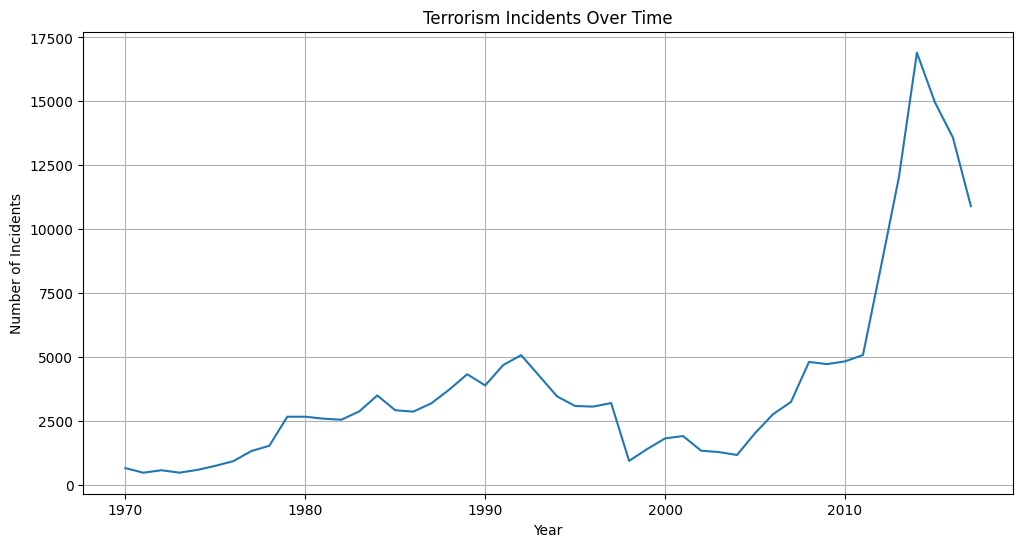

In [21]:
data['iyear'] = pd.to_datetime(data['iyear'], format='%Y')

# Group the data by year and count the number of incidents in each year
incident_counts = data.groupby(data['iyear'].dt.year)['eventid'].count()

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Terrorism Incidents Over Time')
plt.grid(True)
plt.show()

**Defining the terrorist activities in each region**

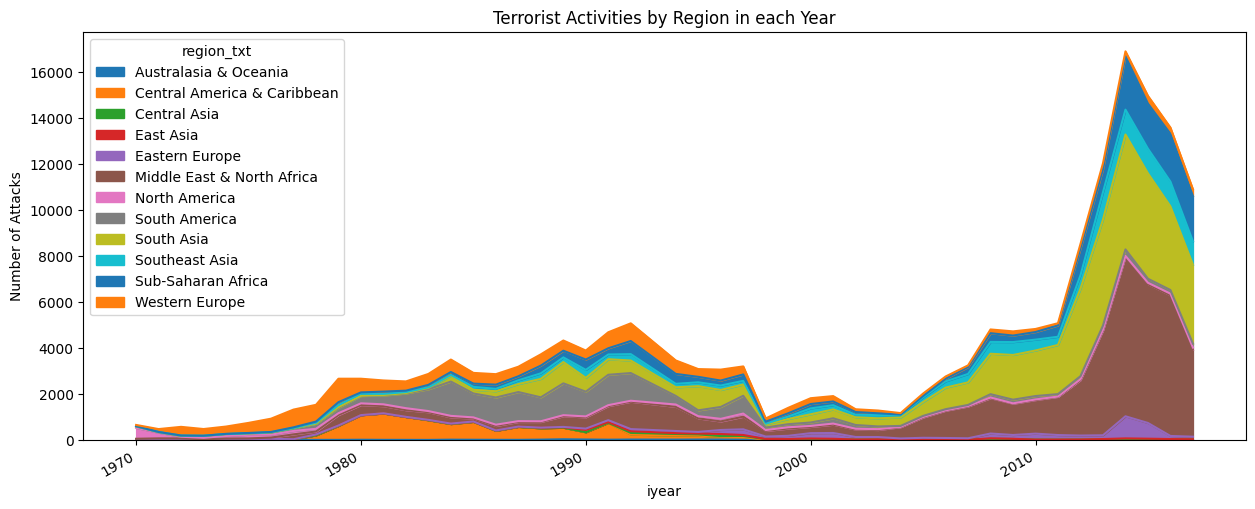

In [22]:
pd.crosstab(data.iyear, data.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

**Top countries affected by terrorist attacks **

C:\Users\Have a Nice Day\AppData\Local\Temp\ipykernel_2852\67833091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['country_txt'].value_counts().index[:15], y=data['country_txt'].value_counts()[:15], palette='Blues_d')


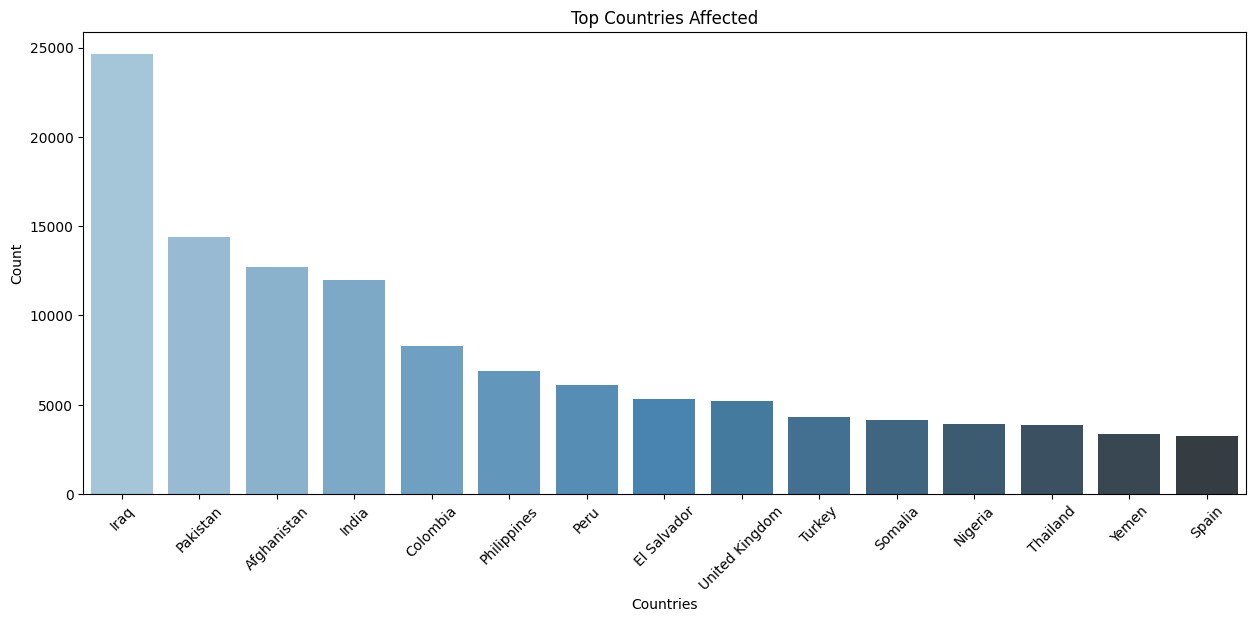

In [30]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=data['country_txt'].value_counts().index[:15], y=data['country_txt'].value_counts()[:15], palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

**To know about the attack types involved**

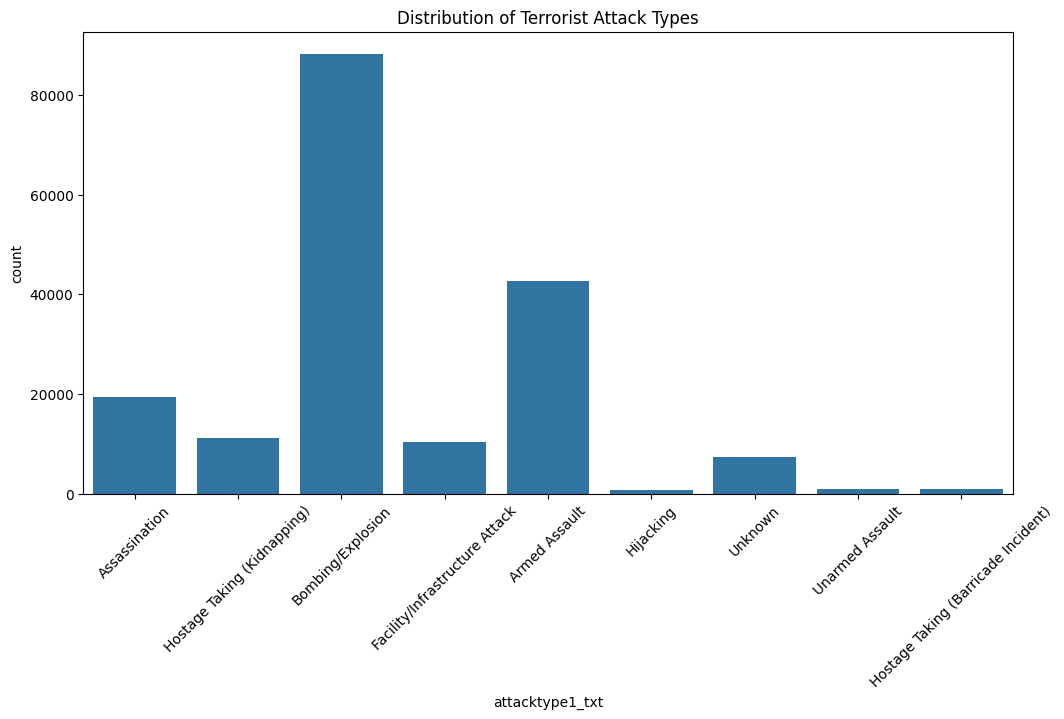

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x='attacktype1_txt')
plt.title('Distribution of Terrorist Attack Types')
plt.xticks(rotation=45)
plt.show()